In [7]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [8]:
path='./DATA/'
fronts = path +'Fig7a.txt'

In [9]:
name=[]
avg=[]
thestd=[]

fp = open(fronts, 'r')

for g in fp.readlines():
    model_name=g.strip()
    data=model_name.split('\t')
    name.append(data[0])
    avg.append(float(data[1]))
    thestd.append(float(data[2]))

In [10]:
refs = avg[-3:]
refs_std = thestd[-3:]
refs_y_error = [0.217874,0.287904,0.113311]
refs_x_error = [118.545767,85.71733137,65.75009225]

In [11]:
x = avg[3:8]
y = thestd[3:8]

m = stats.linregress(x, y)

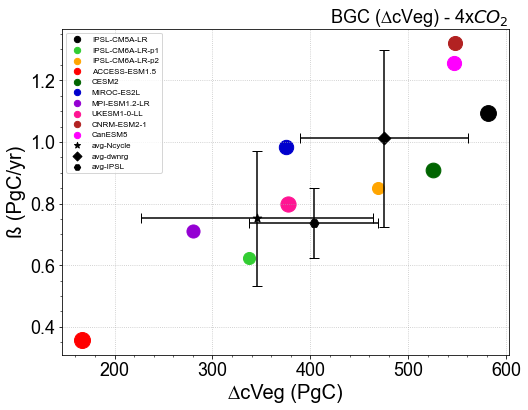

In [13]:
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "18"

fig, ax = plt.subplots(figsize=(8,6))

colors_dict = ['k','limegreen','orange','red','darkgreen','mediumblue', 
               'darkviolet','deeppink','firebrick','fuchsia','black','black','black']

markers_dict=['o','o','o','o','o','o','o','o','o','o','*','D','H']

radius=[625.3709262722348,362.9627878371675,363.03870533014765,639.4543454064013,
544.0517065188044,515.256729161527,428.1330091841852,578.8374934938076,494.51257292591464,502.8350581766298]

radius_good=[2*x for x in radius]
radi_avg=[400,400,400]
radius_dict=radius_good+radi_avg

ax.errorbar(refs,refs_std,refs_y_error ,refs_x_error,fmt=' ', ecolor='k', capsize=5,markerfacecolor='white')

for d in range(0,len(avg)):
  ax.scatter(avg[d],thestd[d],color=colors_dict[d],label=name[d],marker=markers_dict[d],s=(radius_dict[d]/5))

lgnd = ax.legend(fontsize=8)
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
    
ax.grid(linestyle='dotted',linewidth=.8, alpha=0.8)
ax.set_title("BGC (∆cVeg) - 4x$CO_2$",fontsize=18,loc='right')
ax.set_ylabel('ß (PgC/yr)', fontsize=20)
ax.set_xlabel('∆cVeg (PgC)', fontsize=20)
ax.minorticks_on()